In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
exchange_rates = pd.read_csv("euro-daily-hist_1999_2022.csv")
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2024-04-11,1.6448,1.9558,5.4468,1.4688,0.9787,7.7646,NaN,25.392,7.4604,...,4.9713,NaN,11.531,1.4518,NaN,NaN,39.22,34.6336,1.0729,20.1614
1,2024-04-10,1.6399,1.9558,5.433,1.4728,0.981,7.8548,NaN,25.368,7.4594,...,4.9690,NaN,11.4345,1.4605,NaN,NaN,39.536,35.0329,1.086,20.0851
2,2024-04-09,1.6407,1.9558,5.4489,1.4749,0.9819,7.8603,NaN,25.38,7.459,...,4.9682,NaN,11.4555,1.4623,NaN,NaN,39.529,34.9828,1.0867,20.0861
3,2024-04-08,1.6433,1.9558,5.4806,1.4715,0.9807,7.8282,NaN,25.354,7.4588,...,4.9681,NaN,11.4675,1.4607,NaN,NaN,39.769,34.8481,1.0823,20.1574
4,2024-04-05,1.6461,1.9558,5.4633,1.4702,0.9793,7.8421,NaN,25.286,7.459,...,4.9677,NaN,11.526,1.4608,NaN,NaN,39.743,34.6312,1.0841,20.171


In [3]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6535 entries, 0 to 6534
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6535 non-null   object 
 1   [Australian dollar ]      6535 non-null   object 
 2   [Bulgarian lev ]          6133 non-null   object 
 3   [Brazilian real ]         6267 non-null   object 
 4   [Canadian dollar ]        6535 non-null   object 
 5   [Swiss franc ]            6535 non-null   object 
 6   [Chinese yuan renminbi ]  6267 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6535 non-null   object 
 9   [Danish krone ]           6535 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6535 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6535 non-null   object 
 14  [Croatia

# DATA CLEANING

In [4]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)
exchange_rates.head()

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


In [5]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']].copy()
euro_to_dollar.value_counts()

Time        US_dollar
1999-01-04  1.1789       1
2015-10-06  1.1224       1
2015-10-20  1.1373       1
2015-10-19  1.1333       1
2015-10-16  1.1360       1
                        ..
2007-05-08  1.3558       1
2007-05-07  1.3615       1
2007-05-04  1.3561       1
2007-05-03  1.3613       1
2024-04-11  1.0729       1
Length: 6535, dtype: int64

In [6]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6473 entries, 0 to 6534
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       6473 non-null   datetime64[ns]
 1   US_dollar  6473 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 151.7 KB


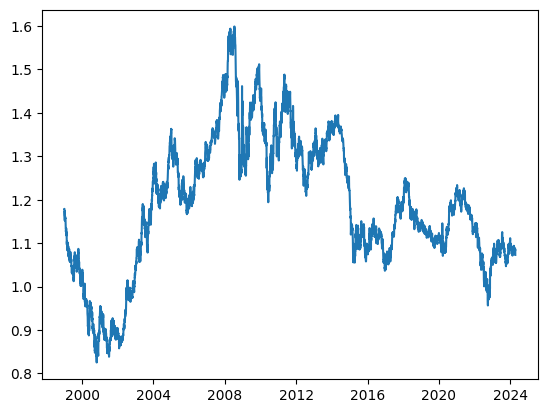

In [7]:
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['US_dollar'])
plt.show()

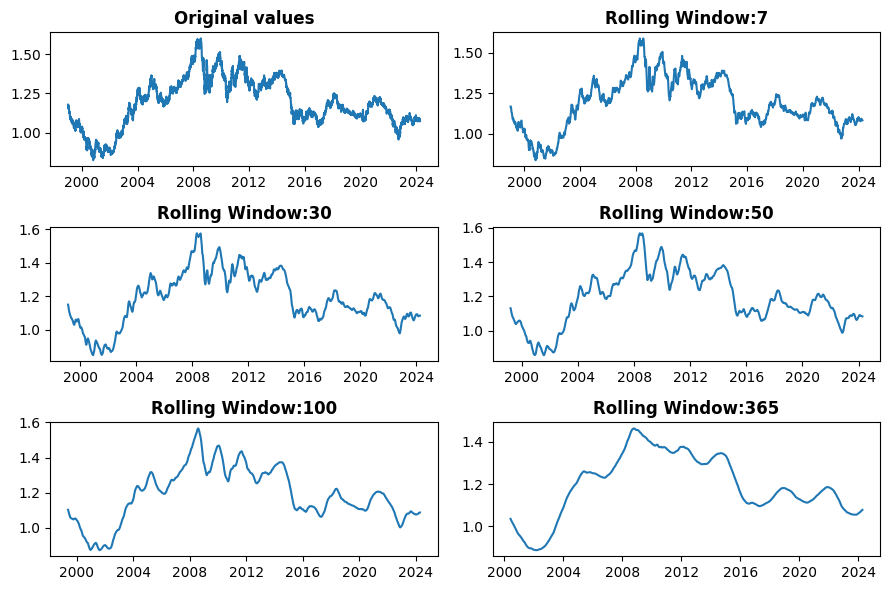

In [8]:
plt.figure(figsize=(9,6))

plt.subplot(3,2,1)
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.title('Original values', weight='bold')

for i, rolling_mean in zip([2, 3, 4, 5, 6],
                           [7, 30, 50, 100, 365]):
    plt.subplot(3,2,i)
    plt.plot(euro_to_dollar['Time'],
             euro_to_dollar['US_dollar'].rolling(rolling_mean).mean())
    plt.title('Rolling Window:' + str(rolling_mean), weight='bold')
    
plt.tight_layout() # Auto-adjusts the padding between subplots
plt.show()

In [9]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar

,Time,US_dollar,rolling_mean
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN
...,...,...,...
6530,2024-04-05,1.0841,1.085630
6531,2024-04-08,1.0823,1.085560
6532,2024-04-09,1.0867,1.085670
6533,2024-04-10,1.0860,1.085697


Here are a few story ideas for our data:

* We show how the euro-dollar rate has changed during the coronavirus pandemic. We can show the 2020 data and the 2016-2019 data as a baseline. We can use a line plot.
* We show how the euro-dollar rate changed during the 2007-2008's financial crisis. We can also show the data for 2016 and 2009 for comparison. We can use a line plot.
* We show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)). We can use a line plot.

# Financial Crisis

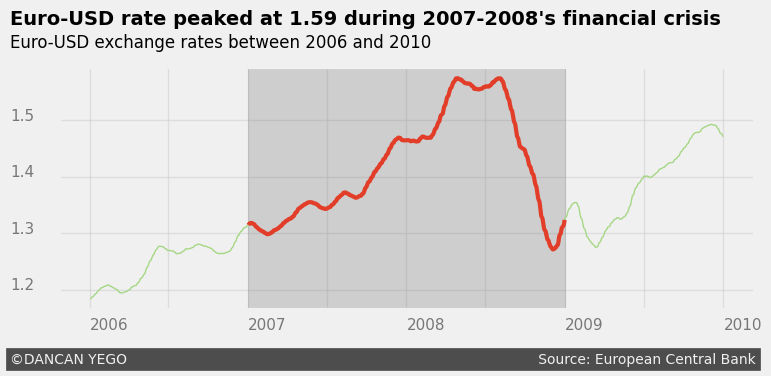

In [18]:
import matplotlib.style as style


financial_crisis = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year >= 2006
                   ) & (euro_to_dollar['Time'].dt.year <= 2009)]
financial_crisis_7_8 = euro_to_dollar.copy(
                   )[(euro_to_dollar.Time.dt.year >= 2007
                   ) & (euro_to_dollar.Time.dt.year <= 2008)]

# Adding the FiveThirtyEight style
style.use('fivethirtyeight')

# Adding the plot
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(financial_crisis['Time'], financial_crisis['rolling_mean'], linewidth=1, color='#A6D785')

# Highlighting the 2007-2008 period
ax.plot(financial_crisis_7_8['Time'], financial_crisis_7_8['rolling_mean'], linewidth=3, color='#e23d28')

# Highlighting the peak of the crisis
ax.axvspan(pd.to_datetime('2007-01-01'), pd.to_datetime('2008-12-31'), alpha=0.3, color='grey')

# Adding separate tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])

# Adding custom tick labels for the x-axis
x_positions = pd.to_datetime(['2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01', '2010-01-01'])
for pos, year in zip(x_positions, ['2006', '2007', '2008', '2009', '2010']):
    ax.text(pos, 1.13, year, alpha=0.5, fontsize=11)

# Adding custom tick labels for the y-axis
y_positions = [1.2, 1.3, 1.4, 1.5]
for pos, rate in zip(y_positions, ['1.2', '1.3', '1.4', '1.5']):
    ax.text(pd.to_datetime('2005-07-01'), pos, rate, alpha=0.5, fontsize=11)

# Adding a title and a subtitle
ax.text(pd.to_datetime('2005-07-01'), 1.67, "Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis", weight='bold')
ax.text(pd.to_datetime('2005-07-01'), 1.63, 'Euro-USD exchange rates between 2006 and 2010', size=12)

# Adding a signature
ax.text(pd.to_datetime('2005-07-01'), 1.07, '©DANCAN YEGO' + ' '*94 + 'Source: European Central Bank', color='#f0f0f0', backgroundcolor='#4d4d4d', size=10)

# Add some transparency to the grid
ax.grid(alpha=0.5)

plt.show()


# The Three US Presidencies Combined

D:\anaconda\envs\dataenv\lib\site-packages\ipykernel_launcher.py:61: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


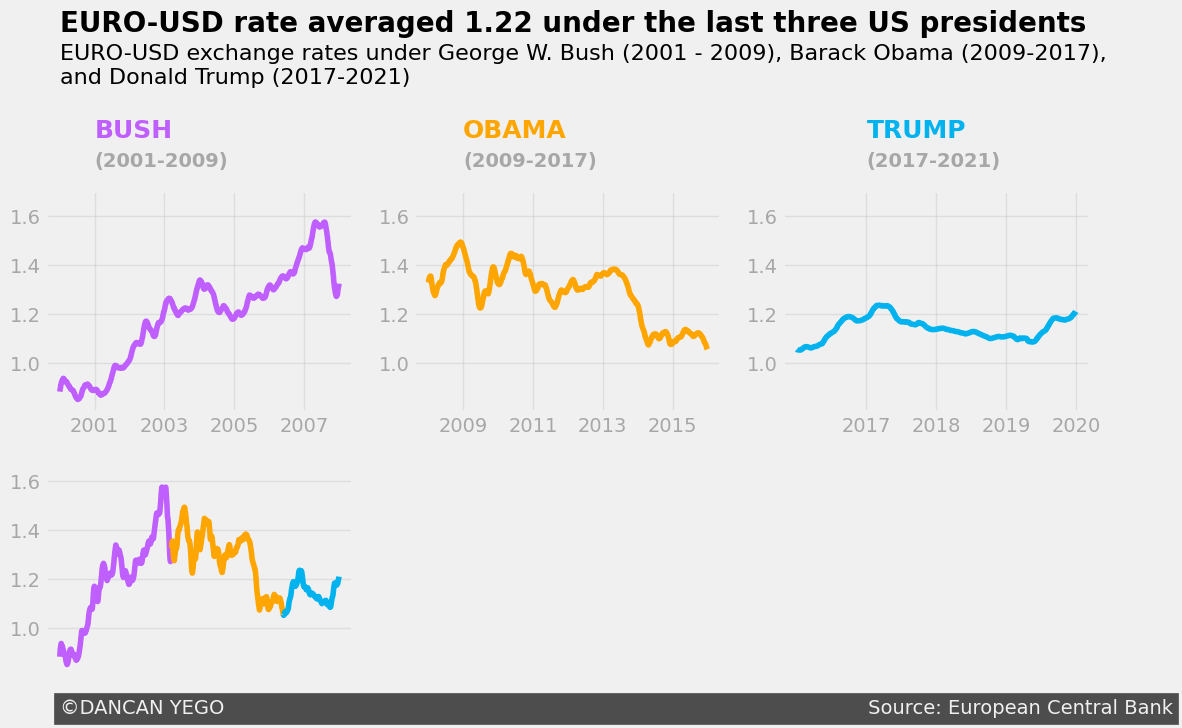

In [24]:
# Create subsets for each president's term
bush_obama_trump = euro_to_dollar[(euro_to_dollar['Time'].dt.year >= 2001) & (euro_to_dollar['Time'].dt.year < 2021)]
bush = bush_obama_trump[bush_obama_trump['Time'].dt.year < 2009]
obama = bush_obama_trump[(bush_obama_trump['Time'].dt.year >= 2009) & (bush_obama_trump['Time'].dt.year < 2017)]
trump = bush_obama_trump[(bush_obama_trump['Time'].dt.year >= 2017) & (bush_obama_trump['Time'].dt.year < 2021)]

# Adding the FiveThirtyEight style
style.use('fivethirtyeight')

# Adding the subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 6))

# Flatten the axes array for easier indexing
ax1, ax2, ax3, ax4 = axes[0, 0], axes[0, 1], axes[0, 2], axes[1, 0]
fig.delaxes(axes[1, 1])
fig.delaxes(axes[1, 2])

# Changes to all the subplots
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2', '1.4', '1.6'], alpha=0.3)
    ax.grid(alpha=0.5)

# Ax1: Bush
ax1.plot(bush['Time'], bush['rolling_mean'], color='#BF5FFF')
ax1.set_xticks(pd.date_range(start='2001', end='2009', freq='2Y'))
ax1.set_xticklabels(['2001', '2003', '2005', '2007'], alpha=0.3)
ax1.text(pd.to_datetime('2002-01-01'), 1.92, 'BUSH', fontsize=18, weight='bold', color='#BF5FFF')
ax1.text(pd.to_datetime('2002-01-01'), 1.8, '(2001-2009)', weight='bold', alpha=0.3)

# Ax2: Obama
ax2.plot(obama['Time'], obama['rolling_mean'], color='#ffa500')
ax2.set_xticks(pd.date_range(start='2009', end='2017', freq='2Y'))
ax2.set_xticklabels(['2009', '2011', '2013', '2015'], alpha=0.3)
ax2.text(pd.to_datetime('2010-01-01'), 1.92, 'OBAMA', fontsize=18, weight='bold', color='#ffa500')
ax2.text(pd.to_datetime('2010-01-01'), 1.8, '(2009-2017)', weight='bold', alpha=0.3)

# Ax3: Trump
ax3.plot(trump['Time'], trump['rolling_mean'], color='#00B2EE')
ax3.set_xticks(pd.date_range(start='2017', end='2021', freq='1Y'))
ax3.set_xticklabels(['2017', '2018', '2019', '2020'], alpha=0.3)
ax3.text(pd.to_datetime('2018-01-01'), 1.92, 'TRUMP', fontsize=18, weight='bold', color='#00B2EE')
ax3.text(pd.to_datetime('2018-01-01'), 1.8, '(2017-2021)', weight='bold', alpha=0.3)

# Ax4: Bush-Obama-Trump
ax4.plot(bush['Time'], bush['rolling_mean'], color='#BF5FFF')
ax4.plot(obama['Time'], obama['rolling_mean'], color='#ffa500')
ax4.plot(trump['Time'], trump['rolling_mean'], color='#00B2EE')
ax4.grid(alpha=0.5)
ax4.set_xticks([])

# Adding a title and a subtitle
ax1.text(pd.to_datetime('2001-01-01'), 2.35, 'EURO-USD rate averaged 1.22 under the last three US presidents', fontsize=20, weight='bold')
ax1.text(pd.to_datetime('2001-01-01'), 2.14, '''EURO-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009-2017),
and Donald Trump (2017-2021)''', fontsize=16)

# Adding a signature
ax4.text(pd.to_datetime('2001-01-01'), 0.65, '©DANCAN YEGO' + ' '*103 + 'Source: European Central Bank', color='#f0f0f0', backgroundcolor='#4d4d4d', size=14)

plt.tight_layout()
plt.show()